In [2]:
# Load in our startup script, required to set runtime for PythonNet
%cd /Lean/Launcher/bin/Debug/
%run start.py

/Lean/Launcher/bin/Debug
20230321 00:38:41.881 TRACE:: Using research_config.json as configuration file
20230321 00:38:41.888 TRACE:: Config.GetValue(): debug-mode - Using default value: False
20230321 00:38:41.888 TRACE:: Config.Get(): Configuration key not found. Key: results-destination-folder - Using default value: 


ArgumentException: Unable to locate any exports matching the requested typeName: QuantConnect.Logging.CompositeLogHandler (Parameter 'typeName')
   at QuantConnect.Util.Composer.GetExportedValueByTypeName[T](String typeName, Boolean forceTypeNameOnExisting) in /Lean/Common/Util/Composer.cs:line 307
   at QuantConnect.Lean.Engine.Initializer.Start() in /Lean/Engine/Initializer.cs:line 48

In [2]:
# Create an instance of our QuantBook
qb = QuantBook()

20230317 07:04:42.685 TRACE:: QuantBook started; Is Python: True
20230317 07:04:42.721 TRACE:: Config.GetValue(): api-data-update-period - Using default value: 1
20230317 07:04:42.872 TRACE:: Config.GetValue(): qb-data-hour - Using default value: 9
20230317 07:04:42.876 TRACE:: Config.Get(): Configuration key not found. Key: data-permission-manager - Using default value: DataPermissionManager
20230317 07:04:42.876 TRACE:: Config.Get(): Configuration key not found. Key: results-destination-folder - Using default value: /Lean/Launcher/bin/Debug
20230317 07:04:42.878 TRACE:: Config.GetValue(): data-purchase-limit - Using default value: 79228162514264337593543950335
20230317 07:04:43.301 TRACE:: ApiDataProvider(): Will use organization Id '3c32e00f5007588009f1b72e38ee40a2'.
20230317 07:04:44.408 TRACE:: ApiDataProvider(): Data Terms of Use has been signed. 
 Find full agreement at: https://www.quantconnect.com/terms/data/?organization=3c32e00f5007588009f1b72e38ee40a2 
CLI API Access Agreem

### Using the Web API
Our script `start.py` automatically loads an instance of the web API for you to use.**

Look at Lean's [Api](https://github.com/QuantConnect/Lean/tree/master/Api) class for more functions to interact with the cloud


##### **Note: This will only connect if you have your User ID and Api token in `config.json` 


In [3]:
# Show that our api object is connected to the Web Api
print(api.Connected)

True


In [4]:
# Get our list of projects from the cloud and print their names
projectResponse = api.ListProjects()
for project in projectResponse.Projects:
    print(project.Name)

clone of qa dynamic turtle v10 1
clone of qa dynamic turtle v10
Test1
Boot Camp/Py/Boot Camp 101/US Equities/Liquid Value Stocks/Using Fundamental Data to Emit Insights
Boot Camp/Py/Boot Camp 101/US Equities/Liquid Value Stocks/Requesting a Fundamental Universe
Boot Camp/Py/Boot Camp 101/US Equities/Liquid Value Stocks/Introduction Video
Boot Camp/Py/Boot Camp 101/US Equities/The Algorithm Framework/Execution Model
Boot Camp/Py/Boot Camp 101/US Equities/The Algorithm Framework/Risk Model
Boot Camp/Py/Boot Camp 101/US Equities/The Algorithm Framework/Portfolio Construction Model
Boot Camp/Py/Boot Camp 101/US Equities/The Algorithm Framework/Alpha Model
Boot Camp/Py/Boot Camp 101/US Equities/The Algorithm Framework/Universe Selection Model
Boot Camp/Py/Boot Camp 101/US Equities/The Algorithm Framework/Framework Overview
Boot Camp/Py/Boot Camp 101/US Equities/The Algorithm Framework/Introduction Video
Boot Camp/Py/Boot Camp 101/US Equities/20050 EMA Momentum Universe/Preparing Indicators 

### Selecting Asset Data
Checkout the QuantConnect [docs](https://www.quantconnect.com/docs#Initializing-Algorithms-Selecting-Asset-Data) to learn how to select asset data.

In [5]:
spy = qb.AddEquity("SPY")
eur = qb.AddForex("EURUSD")
btc = qb.AddCrypto("BTCUSD")
fxv = qb.AddData[FxcmVolume]("EURUSD_Vol", Resolution.Hour)

20230317 07:05:05.261 TRACE:: Api.DownloadData(): Failed to get link for ../../../Data/equity/usa/map_files/map_files_20230316.zip. Errors: File not found: equity/usa/map_files/map_files_20230316.zip
20230317 07:05:05.716 TRACE:: Api.DownloadData(): Failed to get link for ../../../Data/equity/usa/map_files/map_files_20230315.zip. Errors: This data is available for download but is not usable without first having subscription to 'US Equity Security Master by QuantConnect - Bulk Download'. To continue downloading data please obtain a subscription to 'US Equity Security Master by QuantConnect - Bulk Download' from the QuantConnect Pricing page.
20230317 07:05:06.235 TRACE:: Api.DownloadData(): Failed to get link for ../../../Data/equity/usa/map_files/map_files_20230314.zip. Errors: This data is available for download but is not usable without first having subscription to 'US Equity Security Master by QuantConnect - Bulk Download'. To continue downloading data please obtain a subscription t

InvalidOperationException: LocalZipMapFileProvider couldn't find any map files going all the way back to 2/13/2023 12:00:00 AM
   at QuantConnect.Data.Auxiliary.LocalZipMapFileProvider.GetMapFileResolver(AuxiliaryDataKey auxiliaryDataKey) in /Lean/Common/Data/Auxiliary/LocalZipMapFileProvider.cs:line 126
   at QuantConnect.Data.Auxiliary.LocalZipMapFileProvider.Get(AuxiliaryDataKey auxiliaryDataKey) in /Lean/Common/Data/Auxiliary/LocalZipMapFileProvider.cs:line 78
   at QuantConnect.SecurityIdentifier.GetFirstTickerAndDate(IMapFileProvider mapFileProvider, String tickerToday, String market, SecurityType securityType, Nullable`1 mappingResolveDate) in /Lean/Common/SecurityIdentifier.cs:line 667
   at QuantConnect.SecurityIdentifier.GenerateEquity(String symbol, String market, Boolean mapSymbol, IMapFileProvider mapFileProvider, Nullable`1 mappingResolveDate) in /Lean/Common/SecurityIdentifier.cs:line 459
   at QuantConnect.Symbol.Create(String ticker, SecurityType securityType, String market, String alias, Type baseDataType) in /Lean/Common/Symbol.cs:line 70
   at QuantConnect.Algorithm.QCAlgorithm.AddSecurity[T](SecurityType securityType, String ticker, Nullable`1 resolution, String market, Boolean fillDataForward, Decimal leverage, Boolean extendedMarketHours, Nullable`1 mappingMode, Nullable`1 normalizationMode) in /Lean/Algorithm/QCAlgorithm.cs:line 2658
   at QuantConnect.Algorithm.QCAlgorithm.AddEquity(String ticker, Nullable`1 resolution, String market, Boolean fillDataForward, Decimal leverage, Boolean extendedMarketHours, Nullable`1 dataNormalizationMode) in /Lean/Algorithm/QCAlgorithm.cs:line 1786

### Historical Data Requests

We can use the QuantConnect API to make Historical Data Requests. The data will be presented as multi-index pandas.DataFrame where the first index is the Symbol.

For more information, please follow the [link](https://www.quantconnect.com/docs#Historical-Data-Historical-Data-Requests).

In [42]:
# Gets historical data from the subscribed assets, the last 360 datapoints with daily resolution
h1 = qb.History(qb.Securities.Keys, 720, Resolution.Daily)

<Axes: xlabel='time'>

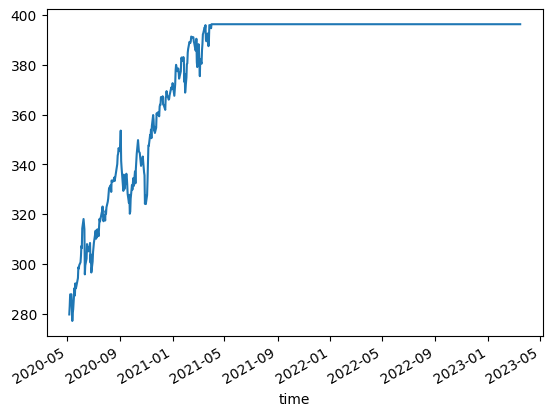

In [43]:
# Plot closing prices from "SPY" 
h1.loc["SPY"]["close"].plot()

In [11]:
# Gets historical data from the subscribed assets, from the last 30 days with daily resolution
h2 = qb.History(qb.Securities.Keys, datetime(2014,1,1), datetime.now(), Resolution.Daily)

<Axes: xlabel='time'>

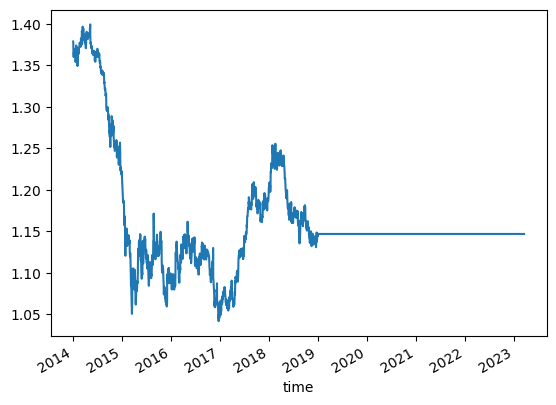

In [12]:
# Plot high prices from "EURUSD" 
h2.loc["EURUSD"]["high"].plot()

In [13]:
# Gets historical data from the subscribed assets, between two dates with daily resolution
h3 = qb.History([btc.Symbol], datetime(2014,1,1), datetime.now(), Resolution.Daily)

<Axes: xlabel='time'>

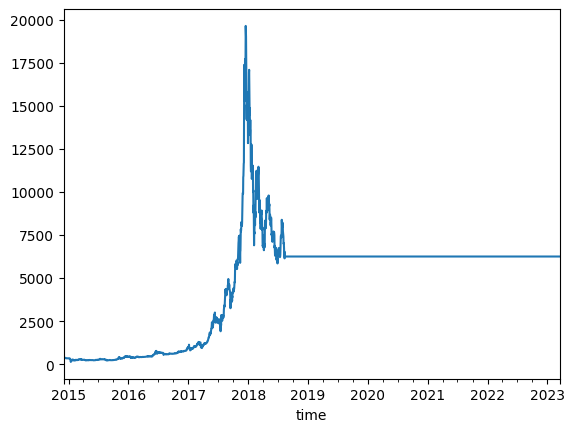

In [14]:
# Plot closing prices from "BTCUSD" 
h3.loc["BTCUSD"]["close"].plot()

In [15]:
# Only fetchs historical data from a desired symbol
# NOTE: This will return empty when ran locally because this data is not included
h4 = qb.History([spy.Symbol], timedelta(360), Resolution.Daily)
# or qb.History(["SPY"], 360, Resolution.Daily)

In [16]:
# Only fetchs historical data from a desired symbol
# NOTE: This will return empty when ran locally because this data is not included
h5 = qb.History([eur.Symbol], timedelta(30), Resolution.Daily)
# or qb.History(["EURUSD"], 30, Resolution.Daily)

### Historical Options Data Requests
- Select the option data
- Sets the filter, otherwise the default will be used SetFilter(-1, 1, timedelta(0), timedelta(35))
- Get the OptionHistory, an object that has information about the historical options data

In [17]:
goog = qb.AddOption("GOOG")
goog.SetFilter(-2, 2, timedelta(0), timedelta(180))

In [18]:
option_history = qb.GetOptionHistory(goog.Symbol, datetime(2015, 12, 24))
print (option_history.GetStrikes())
print (option_history.GetExpiryDates())
h7 = option_history.GetAllData()

[745.0, 747.5, 750.0, 752.5, 755.0, 742.5]
[datetime.datetime(2016, 1, 15, 0, 0), datetime.datetime(2016, 2, 19, 0, 0), datetime.datetime(2016, 3, 18, 0, 0), datetime.datetime(2016, 6, 17, 0, 0)]


### Historical Future Data Requests
- Select the future data
- Sets the filter, otherwise the default will be used SetFilter(timedelta(0), timedelta(35))
- Get the FutureHistory, an object that has information about the historical future data

In [ ]:
es = qb.AddFuture("ES")
es.SetFilter(timedelta(0), timedelta(180))

In [ ]:
future_history = qb.GetFutureHistory(es.Symbol, datetime(2013, 10, 7))
print (future_history.GetExpiryDates())
h7 = future_history.GetAllData()

### Get Fundamental Data

- *GetFundamental([symbol], selector, start_date = datetime(1998,1,1), end_date = datetime.now())*

We will get a pandas.DataFrame with fundamental data.

In [ ]:
data = qb.GetFundamental(["AAPL","AIG","BAC","GOOG","IBM"], "ValuationRatios.PERatio")
data

### Indicators

We can easily get the indicator of a given symbol with QuantBook. 

For all indicators, please checkout QuantConnect Indicators [Reference Table](https://www.quantconnect.com/docs#Indicators-Reference-Table)

In [ ]:
# Example with BB, it is a datapoint indicator
# Define the indicator
bb = BollingerBands(30, 2)

# Gets historical data of indicator
bbdf = qb.Indicator(bb, "SPY", 360, Resolution.Daily)

# drop undesired fields
bbdf = bbdf.drop('standarddeviation', 1)

# Plot
bbdf.plot()

In [ ]:
# For EURUSD
bbdf = qb.Indicator(bb, "EURUSD", 360, Resolution.Daily)
bbdf = bbdf.drop('standarddeviation', 1)
bbdf.plot()

In [ ]:
# Example with ADX, it is a bar indicator
adx = AverageDirectionalIndex("adx", 14)
adxdf = qb.Indicator(adx, "SPY", 360, Resolution.Daily)
adxdf.plot()

In [ ]:
# For EURUSD
adxdf = qb.Indicator(adx, "EURUSD", 360, Resolution.Daily)
adxdf.plot()

In [ ]:
# Example with ADO, it is a tradebar indicator (requires volume in its calculation)
ado = AccumulationDistributionOscillator("ado", 5, 30)
adodf = qb.Indicator(ado, "SPY", 360, Resolution.Daily)
adodf.plot()

In [ ]:
# For EURUSD. 
# Uncomment to check that this SHOULD fail, since Forex is data type is not TradeBar.
# adodf = qb.Indicator(ado, "EURUSD", 360, Resolution.Daily)
# adodf.plot()

In [ ]:
# SMA cross:
symbol = "EURUSD"
# Get History 
hist = qb.History([symbol], 500, Resolution.Daily)
# Get the fast moving average
fast = qb.Indicator(SimpleMovingAverage(50), symbol, 500, Resolution.Daily)
# Get the fast moving average
slow = qb.Indicator(SimpleMovingAverage(200), symbol, 500, Resolution.Daily)

# Remove undesired columns and rename others 
fast = fast.drop('rollingsum', 1).rename(columns={'simplemovingaverage': 'fast'})
slow = slow.drop('rollingsum', 1).rename(columns={'simplemovingaverage': 'slow'})

# Concatenate the information and plot 
df = pd.concat([hist.loc[symbol]["close"], fast, slow], axis=1).dropna(axis=0)
df.plot()

In [ ]:
# Get indicator defining a lookback period in terms of timedelta
ema1 = qb.Indicator(ExponentialMovingAverage(50), "SPY", timedelta(100), Resolution.Daily)
# Get indicator defining a start and end date
ema2 = qb.Indicator(ExponentialMovingAverage(50), "SPY", datetime(2016,1,1), datetime(2016,10,1), Resolution.Daily)

ema = pd.concat([ema1, ema2], axis=1)
ema.plot()

In [ ]:
rsi = RelativeStrengthIndex(14)

# Selects which field we want to use in our indicator (default is Field.Close)
rsihi = qb.Indicator(rsi, "SPY", 360, Resolution.Daily, Field.High)
rsilo = qb.Indicator(rsi, "SPY", 360, Resolution.Daily, Field.Low)
rsihi = rsihi.rename(columns={'relativestrengthindex': 'high'})
rsilo = rsilo.rename(columns={'relativestrengthindex': 'low'})
rsi = pd.concat([rsihi['high'], rsilo['low']], axis=1)
rsi.plot()